In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from google.colab.patches import cv2_imshow as cv_imshow

**Get training and test data**

In [ ]:
%cd /content/drive/My Drive/School/'Fall 2020'/284A/'Diabetic Retinopathy Detection'

/content/drive/My Drive/School/Fall 2020/284A/Diabetic Retinopathy Detection


In [ ]:
data_dir = 'aptos2019_data/'
train_file = os.path.join(data_dir + 'train.csv')
train_dir = os.path.join(data_dir + 'train_images')
test_file = os.path.join(data_dir + 'test.csv')
test_dir = os.path.join(data_dir + 'test_images')

In [ ]:
train_info = pd.read_csv(train_file)
test_info = pd.read_csv(test_file)

**Get training data stats**

In [ ]:
def getNumofInstances(df):
  counts = []
  for i in range(5):
    counts.append(df.loc[df['diagnosis'] == i, 'diagnosis'].count())
  return counts

counts_train = getNumofInstances(train_info)

def printStats(counts):
  total  = sum(counts)
  for i in range(len(counts)):
    print("Label {}: {} or {:.2f}%".format(i,counts[i],counts[i]/total*100))
  print("{} training samples in total".format(total))

printStats(counts_train)

Label 0: 1805 or 49.29%
Label 1: 370 or 10.10%
Label 2: 999 or 27.28%
Label 3: 193 or 5.27%
Label 4: 295 or 8.06%
3662 training samples in total


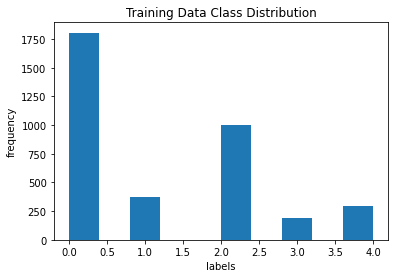

In [ ]:
train_info.hist()
plt.xlabel('labels')
plt.ylabel('frequency')
plt.grid(None)
plt.title('Training Data Class Distribution');

Clearly there is a large class imbalance in the training data set.

In [ ]:
print("Number of test samples: {}".format(test_info.count().values[0]))

Number of test samples: 1928


The labels are not provided for the test samples so there is no information on the class distribution.

**Example Images**


"DR leads to gradual changes in vasculature structure and resulting abnormalities such as microaneurysms, hemorrhages, hard exudates, and cotton wool spots. Along with the changes, there may be a presence of venous beading, retinal neovascularization which can be utilized to classify DR retinopathy in one of the two phases known as non-proliferative diabetic retinopathy (NPDR) and proliferative diabetic retinopathy (PDR)" -  DeepDRiD Challenge

In [ ]:
# n must be even
def plotExamples(ids, n):
  np.random.seed(0)
  rand_ids = ids[np.random.choice(len(ids),n)]

  fig = plt.figure(figsize=(15, 10))
  for i in range(n):
    I = cv.imread(os.path.join(train_dir, rand_ids[i]+".png"))
    fig.add_subplot(n/2,2,i+1)
    plt.imshow(I[:,:,::-1])
    plt.xlabel(rand_ids[i] + ".png")

Grade 0 corresponds to no apparent DR: there should be no signs of abnormalities.

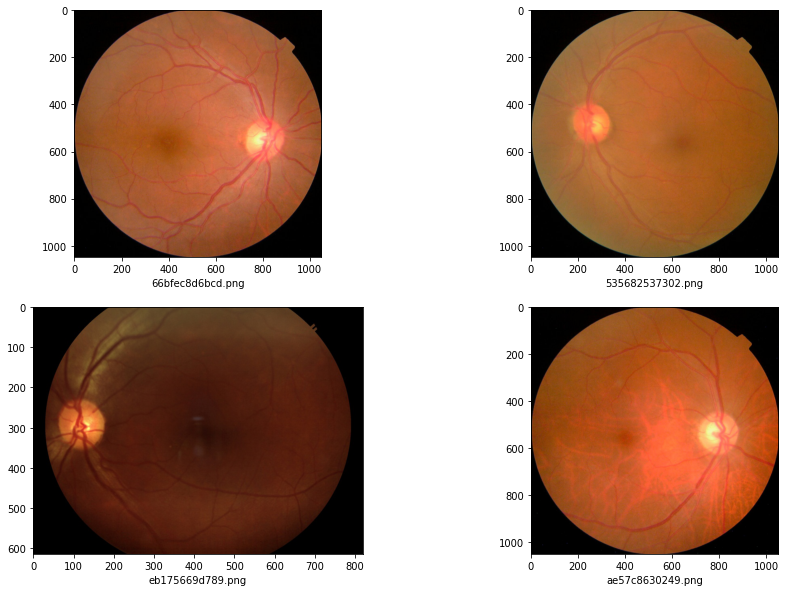

In [ ]:
class0_ids = train_info.loc[train_info['diagnosis'] == 0, ['id_code']].values.flatten()
plotExamples(class0_ids, 4)

Grade 1 corresponds to mild NPDR: only presence of microaneurysms.

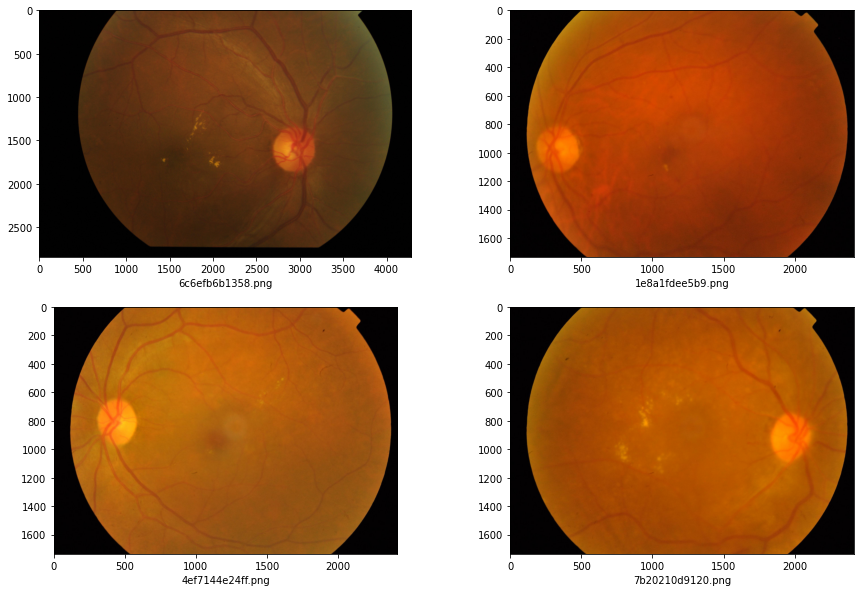

In [ ]:
class1_ids = train_info.loc[train_info['diagnosis'] == 1, ['id_code']].values.flatten()
plotExamples(class1_ids, 4)

Grade 2 corresponds to moderate NPDR: more than just microaneurysms but less than severe NPDR.

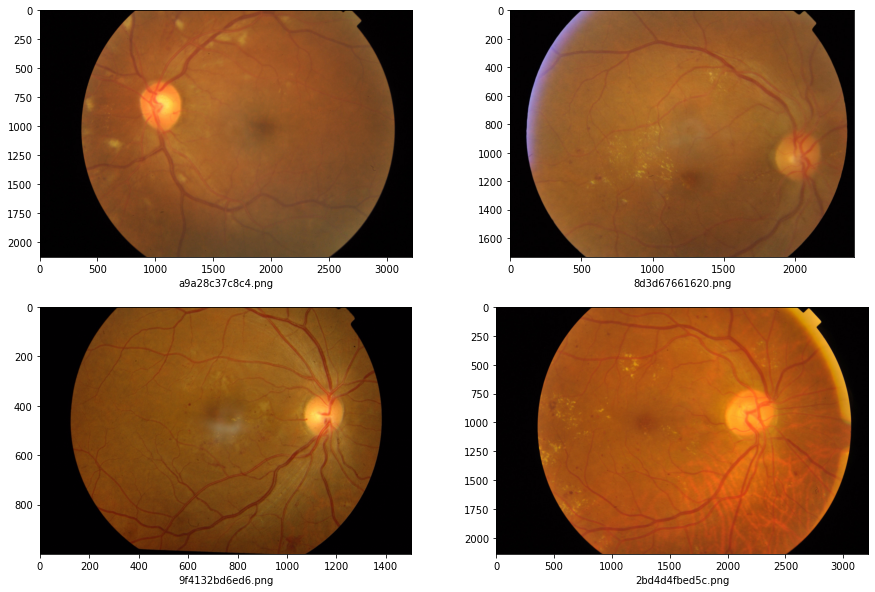

In [ ]:
class2_ids = train_info.loc[train_info['diagnosis'] == 2, ['id_code']].values.flatten()
plotExamples(class2_ids, 4)

Grade 3 corresponds to severe NPDR: 	

Moderate NPDR and any of the following:

• > 20 intraretinal hemorrhages

• Venous beading (localized increase in vein diameter)

• Intraretinal microvascular abnormalities

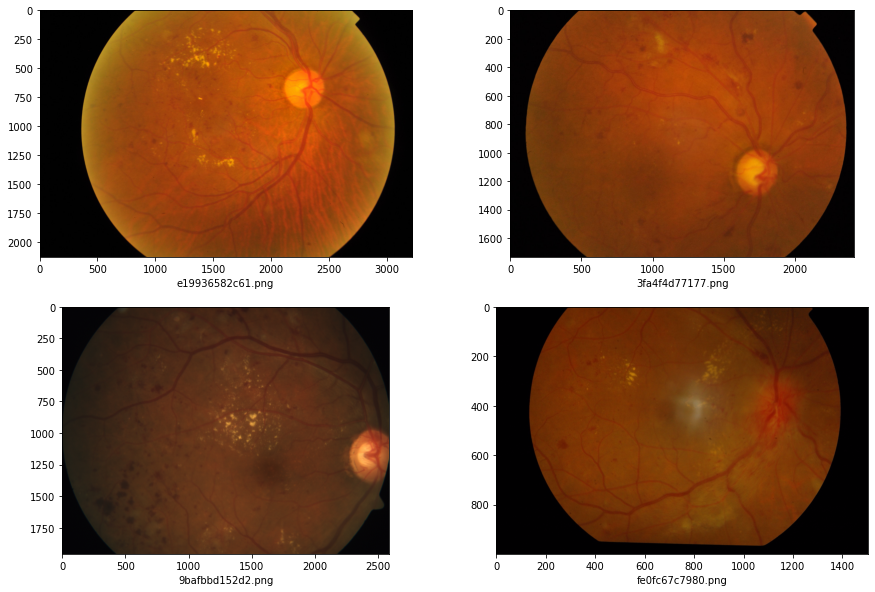

In [ ]:
class3_ids = train_info.loc[train_info['diagnosis'] == 3, ['id_code']].values.flatten()
plotExamples(class3_ids, 4)

Grade 4 corresponds to PDR:
	
Severe NPDR and one or both of the following:

• Neovascularization

• Vitreous/preretinal hemorrhage

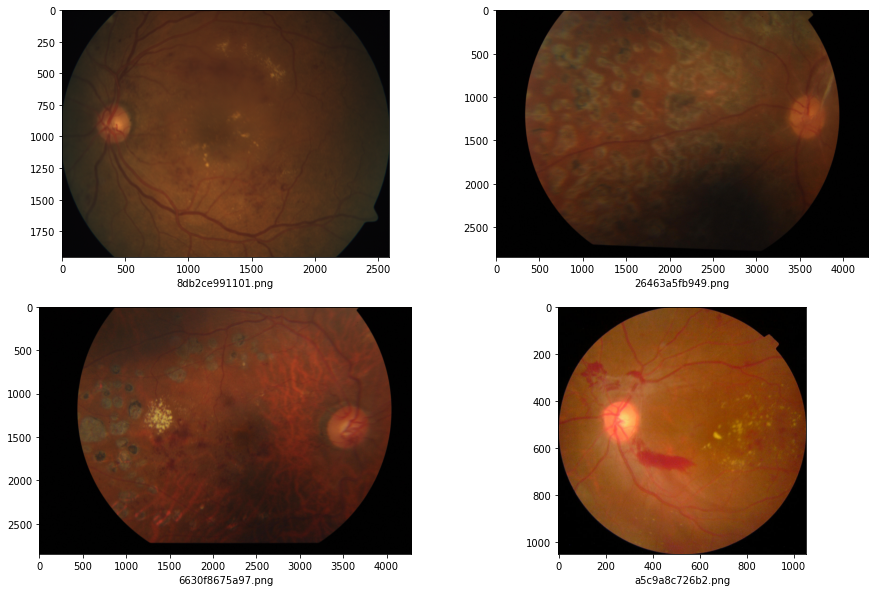

In [ ]:
class4_ids = train_info.loc[train_info['diagnosis'] == 4, ['id_code']].values.flatten()
plotExamples(class4_ids, 4)